<a href="https://colab.research.google.com/github/lala-lagrange/Julia-sublime/blob/master/SIMPLE_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
! kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 41.5MB/s]
100% 15.3M/15.3M [00:00<00:00, 95.7MB/s]


In [3]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/content/train.csv")#reading the dataset

In [7]:
data.head()#printing first 5 rows of the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = np.array(data)#converting data from dataframe to numpy array 
m, n = data.shape#defining rows and columns of data
np.random.shuffle(data)#shuffling the dataset

In [18]:
#defining validation data
data_dev = data[0:1000].T#T here represents transpose
Y_dev = data_dev[0]#defining output column
X_dev = data_dev[1:n]#defining inputs, n is the number of columns, defined earlier
X_dev = X_dev / 255.

#defining training data
data_train = data[1000:m].T#defining X, T here represents transpose, m is the number of rows, defined earlier
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [19]:
Y_train

array([0, 9, 9, ..., 2, 0, 4])

In [20]:
def init_params():#a function to generate initial parameters
  W1 = np.random.rand(10,784) - 0.5 #defining weights for 1st layer
  b1 = np.random.rand(10,1) - 0.5 #defining biases for 1st layer
  W2 = np.random.rand(10,10) - 0.5 #defining weights for 2nd layer
  b2 = np.random.rand(10,1) - 0.5 #defining biases for 2nd layer
  return W1, b1, W2, b2

def ReLU(Z):#defining the ReLU activation function : for 1st layer
  return np.maximum(0,Z)

def softmax(Z):#defining softmax activation function : for 2nd layer
  A = np.exp(Z)/sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X)+b1#defining first layer
  A1 = ReLU(Z1)#activating first layer
  Z2 = W2.dot(A1)+b2#defining 2nd layer
  A2 = softmax(Z2)#activating 2nd layer
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)

  dZ1 = W2.T.dot(dZ2)*deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)

  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [21]:
def get_predictions(A2):
  return np.argmax(A2,0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)#starting the cycle with forward prop
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)#continuing with back propagation
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)#updating the parameters
    if i % 10 == 0:
      print("Iteration : ", i)
      print("Accuracy : ", get_accuracy(get_predictions(A2),Y))
  return W1, b1, W2, b2


In [22]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration :  0
[7 7 0 ... 8 0 0] [0 9 9 ... 2 0 4]
Accuracy :  0.051073170731707314
Iteration :  10
[7 5 8 ... 8 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.11714634146341464
Iteration :  20
[7 5 4 ... 0 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.16973170731707318
Iteration :  30
[5 5 4 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.21539024390243902
Iteration :  40
[5 5 9 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.26626829268292684
Iteration :  50
[5 5 9 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.3027073170731707
Iteration :  60
[5 5 9 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.33675609756097563
Iteration :  70
[5 3 9 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.37409756097560976
Iteration :  80
[5 3 9 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.41165853658536583
Iteration :  90
[5 3 9 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.4455609756097561
Iteration :  100
[5 9 9 ... 2 2 4] [0 9 9 ... 2 0 4]
Accuracy :  0.48092682926829267
Iteration :  110
[5 9 9 ... 2 0 4] [0 9 9 ... 2 0 4]
Accuracy :  0.5142195121

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


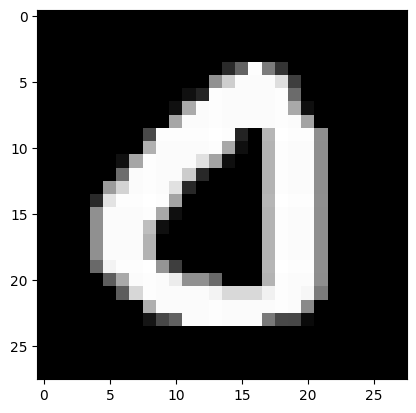

Prediction:  [9]
Label:  9


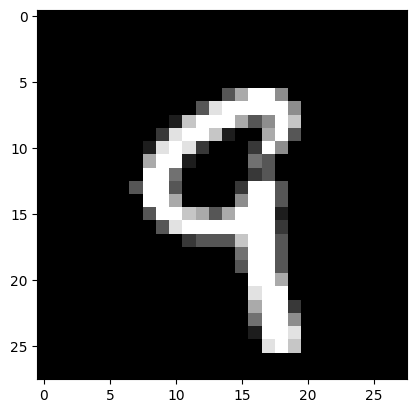

Prediction:  [9]
Label:  9


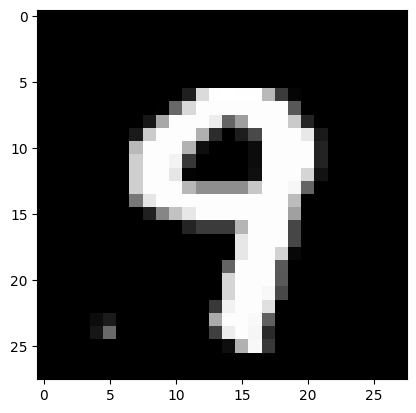

Prediction:  [2]
Label:  2


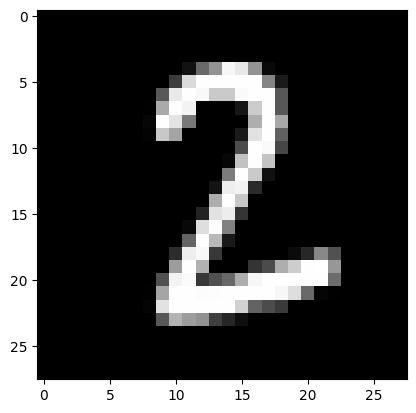

In [24]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)